<h1>Лабораторна робота №6 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

11490434/11490434 [==============================] - 2s 0us/step


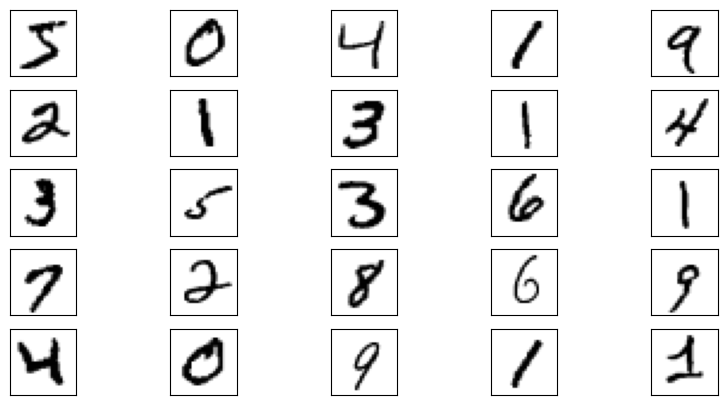

In [3]:
# завантаження набору даних MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормалізація даних
x_train, x_test = x_train / 255.0, x_test / 255.0

# вивід картинок
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [5]:
# створення моделі нейронної мережі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Перетворення матриці 28x28 у вектор
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар з активацією ReLU
    layers.Dropout(0.2),  # Dropout для уникнення перенавчання
    layers.Dense(10, activation='softmax')  # Вихідний шар з активацією softmax для класифікації
])

# компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Тренування моделі

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# оцінка ефективності моделі на тестовому наборі
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.0716 - val_accuracy: 0.9774
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9805 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9836 - val_loss: 0.0689 - val_accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0670 - val_accuracy: 0.9792
313/313 - 0s - loss: 0.0670 - accuracy: 0.9792 - 474ms/epoch - 2ms/step

Точність на тестовому наборі: 0.979200005531311


1/1 [==============================] - 0s 27ms/step
[[7.9955448e-10 1.1841575e-10 4.3779913e-09 9.2273137e-07 2.0530613e-02
  8.3489880e-08 1.4768894e-11 1.1232650e-03 3.9201765e-05 9.7830588e-01]]


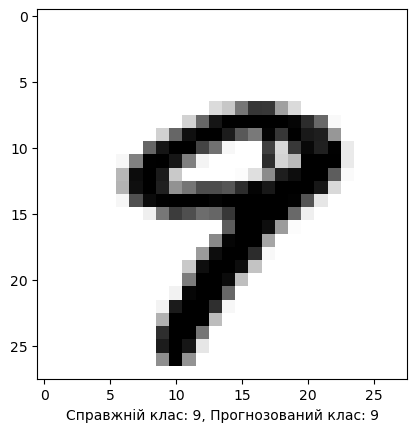

In [10]:
# візуалізація результатів класифікації
n = 9
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.xlabel(f"Справжній клас: {y_test[n]}, "
           f"Прогнозований клас: {np.argmax(res) }")
plt.show()

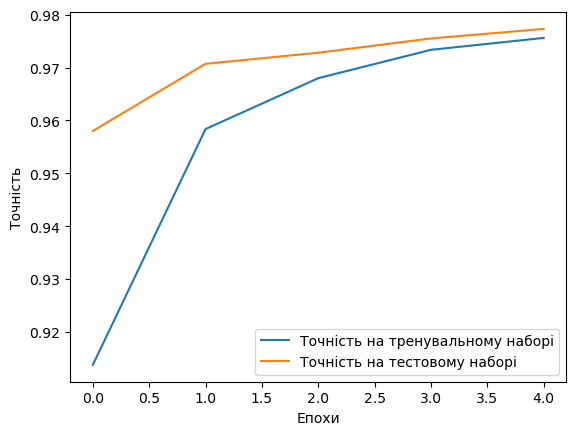

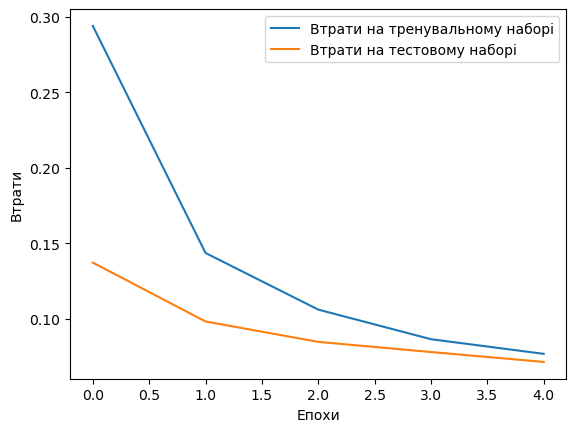

In [11]:
# Графіки точності
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на тестовому наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Графіки втрат
plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на тестовому наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


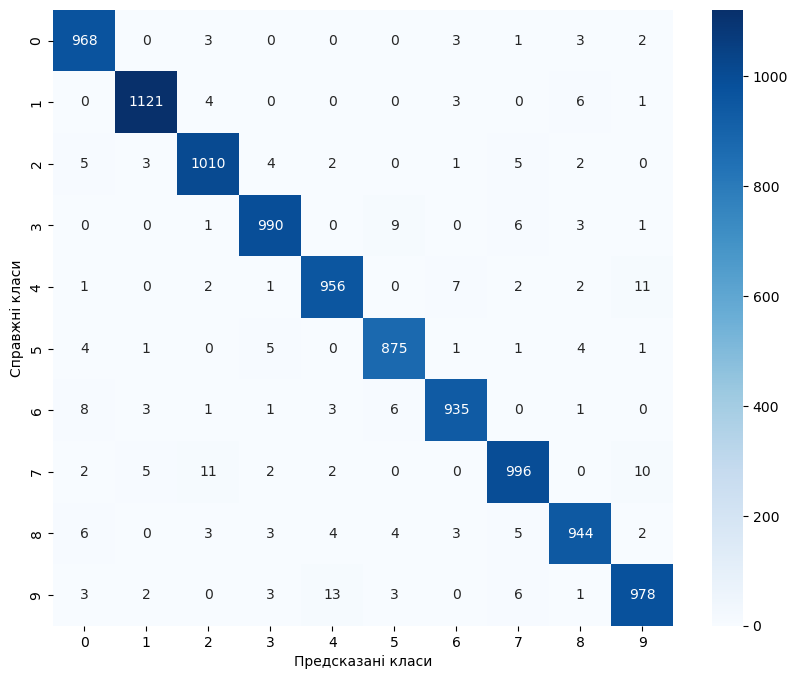

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Предсказані класи')
plt.ylabel('Справжні класи')
plt.show()